## Problem Statement

In [ ]:
Part A :
Build an algorithm/model that can quantify the degree of similarity between the two text-based on 
Semantic similarity. Semantic Textual Similarity (STS) assesses the degree to which two sentences are 
semantically equivalent to each other.
1 means highly similar 
0 means highly dissimilar 

Part B : 
Deploy the Algorithm/Model built-in Part A in any cloud service provider. Your final algorithm should be 
exposed as a Server API Endpoint. In order to test this API make sure you hit a request to the server to 
get the result as a response to the API. The request-response body should be in the following format: 
Request body: {“text1”: ”nuclear body seeks new tech .......”, ”text2”: ”terror suspects face arrest ......”} 
Response body: {“similarity score”: 0.2 }
Note: “text1”, “text2”, and “similarity score” keys should be kept as it is, without any change.

## Import Libraries

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from contractions import fix
from unidecode import unidecode

from nltk.stem import WordNetLemmatizer, LancasterStemmer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.util import ngrams

from gensim.models import KeyedVectors, Word2Vec



import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
df = pd.read_csv("DataNeuron_Text_Similarity.csv")
df

,text1,text2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...
...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text1   3000 non-null   object
 1   text2   3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [5]:
df['text1'][0]

'broadband challenges tv viewing the number of europeans with broadband has exploded over the past 12 months  with the web eating into tv viewing habits  research suggests.  just over 54 million people are hooked up to the net via broadband  up from 34 million a year ago  according to market analysts nielsen/netratings. the total number of people online in europe has broken the 100 million mark. the popularity of the net has meant that many are turning away from tv  say analysts jupiter research. it found that a quarter of web users said they spent less time watching tv in favour of the net  the report by nielsen/netratings found that the number of people with fast internet access had risen by 60% over the past year.  the biggest jump was in italy  where it rose by 120%. britain was close behind  with broadband users almost doubling in a year. the growth has been fuelled by lower prices and a wider choice of always-on  fast-net subscription plans.  twelve months ago high speed internet

In [6]:
df['text2'][0]

'gardener wins double in glasgow britain s jason gardener enjoyed a double 60m success in glasgow in his first competitive outing since he won 100m relay gold at the athens olympics.  gardener cruised home ahead of scot nick smith to win the invitational race at the norwich union international. he then recovered from a poor start in the second race to beat swede daniel persson and italy s luca verdecchia. his times of 6.61 and 6.62 seconds were well short of american maurice greene s 60m world record of 6.39secs from 1998.  it s a very hard record to break  but i believe i ve trained very well   said the world indoor champion  who hopes to get closer to the mark this season.  it was important to come out and make sure i got maximum points. my last race was the olympic final and there was a lot of expectation.  this was just what i needed to sharpen up and get some race fitness. i m very excited about the next couple of months.   double olympic champion  marked her first appearance on h

## Data Preprocessing 

In [3]:
def remove_blank(data):
    clean_text = data.replace("\\n"," ").replace("\t"," ")
    return clean_text

def expand_text(data):
    clean_text = fix(data)
    return clean_text

stopword_list = stopwords.words("english")
stopword_list.remove("no")
stopword_list.remove("nor")
stopword_list.remove("not")

def clean_text(data):
    tokens = word_tokenize(data)
    clean_data = [word.lower() for word in tokens if (word.lower() not in punctuation) and (word.lower() not in stopword_list) and ( len(word)>2) and (word.isalpha()) ]
    return clean_data

def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_text = []
    for word in data:
        lemmatized_word = lemmatizer.lemmatize(word)
        final_text.append(lemmatized_word)
    return final_text#" ".join(final_text)


In [7]:
df['Token_text1'] = df['text1'].apply(remove_blank)
df['Token_text1'] = df['Token_text1'].apply(expand_text)
df['Token_text1'] = df['Token_text1'].apply(clean_text)
df['Token_text1'] = df['Token_text1'].apply(lemmatization)


df['Token_text2'] = df['text2'].apply(remove_blank)
df['Token_text2'] = df['Token_text2'].apply(expand_text)
df['Token_text2'] = df['Token_text2'].apply(clean_text)
df['Token_text2'] = df['Token_text2'].apply(lemmatization)


df

,text1,text2,Token_text1,Token_text2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,"[broadband, challenge, viewing, number, europe...","[gardener, win, double, glasgow, britain, jaso..."
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,"[rap, bos, arrested, drug, find, rap, mogul, m...","[amnesty, chief, lament, war, failure, lack, p..."
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,"[player, worry, robinson, england, coach, andy...","[hank, greeted, wintry, premiere, hollywood, s..."
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,"[heart, oak, cotonsport, heart, oak, set, ghan...","[redford, vision, sundance, despite, sporting,..."
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,"[sir, paul, rock, super, bowl, crowd, sir, pau...","[mauresmo, open, victory, amelie, mauresmo, ma..."
...,...,...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...,"[director, guild, nominee, named, martin, scor...","[steel, firm, cut, job, mittal, steel, one, wo..."
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...,"[play, grammy, award, show, irish, rock, band,...","[israel, look, bank, chief, israel, asked, ban..."
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...,"[pountney, handed, ban, fine, northampton, coa...","[india, iran, gas, export, deal, india, signed..."
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...,"[belle, named, best, scottish, band, belle, se...","[mido, make, third, apology, ahmed, mido, hoss..."


In [8]:
df['Token_len_Text1'] = df.Token_text1.apply(lambda x: len(x))
df['Token_len_Text2'] = df.Token_text2.apply(lambda x: len(x))
df

,text1,text2,Token_text1,Token_text2,Token_len_Text1,Token_len_Text2
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,"[broadband, challenge, viewing, number, europe...","[gardener, win, double, glasgow, britain, jaso...",211,278
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,"[rap, bos, arrested, drug, find, rap, mogul, m...","[amnesty, chief, lament, war, failure, lack, p...",133,273
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,"[player, worry, robinson, england, coach, andy...","[hank, greeted, wintry, premiere, hollywood, s...",133,131
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,"[heart, oak, cotonsport, heart, oak, set, ghan...","[redford, vision, sundance, despite, sporting,...",157,257
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,"[sir, paul, rock, super, bowl, crowd, sir, pau...","[mauresmo, open, victory, amelie, mauresmo, ma...",229,194
...,...,...,...,...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...,"[director, guild, nominee, named, martin, scor...","[steel, firm, cut, job, mittal, steel, one, wo...",162,148
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...,"[play, grammy, award, show, irish, rock, band,...","[israel, look, bank, chief, israel, asked, ban...",112,139
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...,"[pountney, handed, ban, fine, northampton, coa...","[india, iran, gas, export, deal, india, signed...",78,147
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...,"[belle, named, best, scottish, band, belle, se...","[mido, make, third, apology, ahmed, mido, hoss...",174,192


### Data Visualization

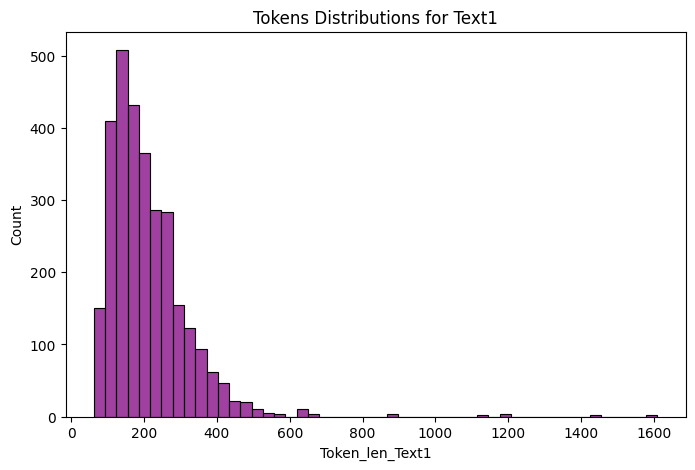

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['Token_len_Text1'],color='Purple',bins=50)
plt.title("Tokens Distributions for Text1")
plt.show()

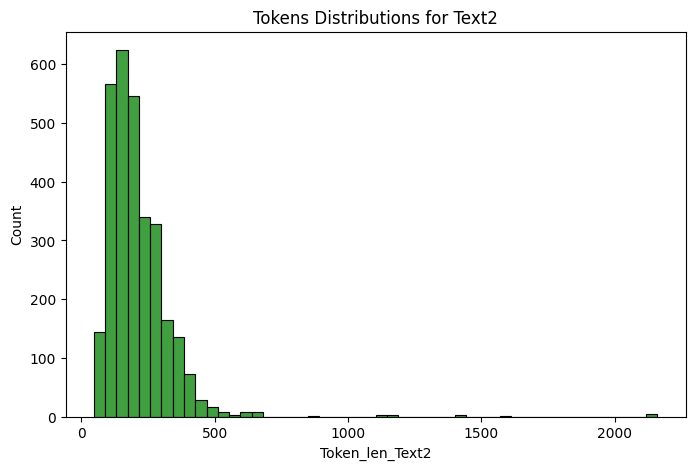

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['Token_len_Text2'],color='Green', bins=50)
plt.title("Tokens Distributions for Text2")
plt.show()

In [27]:
df.Token_len_Text1.describe()

count    3000.000000
mean      209.668667
std       115.708065
min        62.000000
25%       134.000000
50%       186.000000
75%       261.000000
max      1610.000000
Name: Token_len_Text1, dtype: float64

In [28]:
df.Token_len_Text2.describe()

count    3000.000000
mean      211.503667
std       133.432433
min        47.000000
25%       134.000000
50%       186.000000
75%       261.000000
max      2160.000000
Name: Token_len_Text2, dtype: float64

In [29]:
# Convert Text data into list
final_list_text1 = df['Token_text1'].to_list()
final_list_text2 = df['Token_text2'].to_list()

In [32]:
# Total Text Length
print(len(final_list_text1))
print(len(final_list_text2))

3000
3000


In [33]:
final_text = final_list_text1 + final_list_text2

In [34]:
len(final_text)

6000

## Load Word2Vec Model

In [35]:
# Load Word2Vec Model
word2vec_model = Word2Vec(final_text, window=3, min_count=2)

In [36]:
# Vector Size
word2vec_model.vector_size

100

## Vector Representation of Wach Word

In [37]:
word2vec_model.wv['good']

array([ 0.2560204 , -0.29279464,  1.5086288 , -0.41526222, -0.14551057,
       -1.1771027 , -0.11134037,  0.20530303, -1.1092994 , -0.10493798,
        0.82181877, -2.162085  , -0.8856226 , -0.54447085,  0.68457985,
       -1.0971681 ,  0.5055037 , -1.5506512 ,  0.85933036, -0.1159007 ,
        0.15369318, -0.7418742 ,  0.11902852,  0.25993648, -0.18258026,
        0.32263902, -0.684035  ,  1.1230831 ,  1.1468152 ,  1.3256478 ,
        0.28311974,  0.7904955 , -0.678     , -0.190882  ,  0.662486  ,
        0.41343877,  1.5041443 , -0.09605668,  0.36393857, -0.94363284,
        2.0769114 , -0.5117045 ,  1.186844  ,  1.0528741 ,  1.5664512 ,
        0.18480477, -0.4704832 ,  1.4819287 , -0.75544673,  2.9162812 ,
        0.42245722, -0.47020656,  1.4304447 , -0.21082611, -1.214679  ,
        0.6187846 ,  0.07942294, -0.01563858, -0.9014622 ,  0.8593452 ,
       -0.46687484,  1.8417063 , -0.5343594 , -0.5567653 , -0.00498231,
        1.7224939 , -0.06855934,  1.6051656 , -0.5171766 ,  0.81

In [38]:
# Vector size is 100
word2vec_model.wv['king'].shape

(100,)

### Cosine Similarity of Word2Vec

In [39]:
# Here cosine similarity of two vector
word2vec_model.wv.similarity("good","bad")

0.6241589

In [45]:
# Here cosine similarity of two vector
word2vec_model.wv.similarity("king","queen")

0.7931217

In [43]:
v1 = word2vec_model.wv['good'].reshape(1,-1)
v2 = word2vec_model.wv['bad'].reshape(1,-1)

print(f"Cosine Similarity of two word:{cosine_similarity(v1,v2)[0][0]}")

Cosine Similarity of two word:0.6241588592529297


In [44]:
v1 = word2vec_model.wv['king'].reshape(1,-1)
v2 = word2vec_model.wv['queen'].reshape(1,-1)

print(f"Cosine Similarity of two word:{cosine_similarity(v1,v2)[0][0]}")

Cosine Similarity of two word:0.7931216359138489


### Model Build Using word2Vec

In [46]:
def vectorizer(list_of_docs,model):
    
    feature =[] # save rew vector 
    for rew in list_of_docs: # iterating over reviews
        zero_vector = np.zeros(model.vector_size) # keyerror
        vectors =[] # to append vector of each word
        for word in rew : # iterating over all words in a review
            if word in model.wv: # checking if word is there in our vocab
                try :
                    vectors.append(model.wv[word]) # appending vector of each word
                except KeyError:
                    continue
        if vectors: # if Vectors is a empty list or not 
            vectors = np.asarray(vectors) # converting multiple arrays into a single array
            avg_vec = vectors.mean(axis=0) # avg of all vectors
            feature.append(avg_vec) # appending the avg vector
        else :
            feature.append(zero_vector) # handling key error
    return feature


In [47]:
vector_text1 = vectorizer(final_list_text1,word2vec_model)
vector_text2 = vectorizer(final_list_text2, word2vec_model)

In [51]:
len(vector_text1)

3000

In [52]:
vector_text1[0]

array([ 7.6739579e-02,  1.2109427e-01, -4.1454333e-01,  2.7320695e-01,
        3.9770082e-02, -7.9797393e-01,  1.4303364e-01,  1.4656943e+00,
       -7.0767212e-01, -4.9161062e-01, -1.9070376e-01, -8.9988345e-01,
        4.0187141e-01,  2.1616253e-01,  4.3977791e-01, -4.0433383e-01,
        2.8682745e-01, -6.5810817e-01, -6.6701367e-02, -8.1991237e-01,
        3.9104915e-01, -1.0395435e-02,  4.7145262e-01,  1.2774011e-01,
        1.0103203e-02,  4.3017271e-01, -6.2191397e-01,  1.2287734e-01,
       -3.5391250e-01,  4.1289654e-01,  3.9394435e-01, -4.6466845e-01,
        1.6296174e-01, -4.8930445e-01,  9.8282963e-02,  2.0744152e-01,
        2.2412683e-01, -3.8881752e-01, -1.7790824e-01, -3.2436103e-02,
        1.1001133e-03, -5.5774164e-01,  1.5843714e-02,  1.0836299e-01,
        4.8244965e-01, -3.7222326e-01, -4.3897602e-01, -8.7721452e-02,
       -2.5782216e-02,  4.9442433e-02, -6.3570373e-02, -1.9524696e-01,
       -9.8256199e-03, -1.6610169e-01, -2.8665933e-01,  7.9018705e-02,
      

In [53]:
vector_text1[0].shape

(100,)

In [48]:
similarity = []
for i in range(len(vector_text1)):
    text1 = vector_text1[i].reshape(1,-1)
    text2 = vector_text2[i].reshape(1,-1)
    score = cosine_similarity(text1,text2)[0][0]
    similarity.append(score)

In [50]:
# Dataframe which contains similarity between two text >> value 0-1
df['Cosine_Similarity'] = similarity
df

,text1,text2,Token_text1,Token_text2,Token_len_Text1,Token_len_Text2,Cosine_Similarity
0,broadband challenges tv viewing the number of ...,gardener wins double in glasgow britain s jaso...,"[broadband, challenge, viewing, number, europe...","[gardener, win, double, glasgow, britain, jaso...",211,278,0.566142
1,rap boss arrested over drug find rap mogul mar...,amnesty chief laments war failure the lack of ...,"[rap, bos, arrested, drug, find, rap, mogul, m...","[amnesty, chief, lament, war, failure, lack, p...",133,273,0.655384
2,player burn-out worries robinson england coach...,hanks greeted at wintry premiere hollywood sta...,"[player, worry, robinson, england, coach, andy...","[hank, greeted, wintry, premiere, hollywood, s...",133,131,0.720679
3,hearts of oak 3-2 cotonsport hearts of oak set...,redford s vision of sundance despite sporting ...,"[heart, oak, cotonsport, heart, oak, set, ghan...","[redford, vision, sundance, despite, sporting,...",157,257,0.668723
4,sir paul rocks super bowl crowds sir paul mcca...,mauresmo opens with victory in la amelie maure...,"[sir, paul, rock, super, bowl, crowd, sir, pau...","[mauresmo, open, victory, amelie, mauresmo, ma...",229,194,0.813829
...,...,...,...,...,...,...,...
2995,uk directors guild nominees named martin scors...,steel firm to cut 45 000 jobs mittal steel ...,"[director, guild, nominee, named, martin, scor...","[steel, firm, cut, job, mittal, steel, one, wo...",162,148,0.453255
2996,u2 to play at grammy awards show irish rock ba...,israel looks to us for bank chief israel has a...,"[play, grammy, award, show, irish, rock, band,...","[israel, look, bank, chief, israel, asked, ban...",112,139,0.534584
2997,pountney handed ban and fine northampton coach...,india and iran in gas export deal india has si...,"[pountney, handed, ban, fine, northampton, coa...","[india, iran, gas, export, deal, india, signed...",78,147,0.558960
2998,belle named best scottish band belle & sebas...,mido makes third apology ahmed mido hossam h...,"[belle, named, best, scottish, band, belle, se...","[mido, make, third, apology, ahmed, mido, hoss...",174,192,0.800890


In [54]:
# Save Word2Vec Model
word2vec_model.save("word2vec_model.bin")

In [55]:
# Load The Word2Vec
model = Word2Vec.load("word2vec_model.bin")

In [56]:
model.wv['good']

array([ 0.2560204 , -0.29279464,  1.5086288 , -0.41526222, -0.14551057,
       -1.1771027 , -0.11134037,  0.20530303, -1.1092994 , -0.10493798,
        0.82181877, -2.162085  , -0.8856226 , -0.54447085,  0.68457985,
       -1.0971681 ,  0.5055037 , -1.5506512 ,  0.85933036, -0.1159007 ,
        0.15369318, -0.7418742 ,  0.11902852,  0.25993648, -0.18258026,
        0.32263902, -0.684035  ,  1.1230831 ,  1.1468152 ,  1.3256478 ,
        0.28311974,  0.7904955 , -0.678     , -0.190882  ,  0.662486  ,
        0.41343877,  1.5041443 , -0.09605668,  0.36393857, -0.94363284,
        2.0769114 , -0.5117045 ,  1.186844  ,  1.0528741 ,  1.5664512 ,
        0.18480477, -0.4704832 ,  1.4819287 , -0.75544673,  2.9162812 ,
        0.42245722, -0.47020656,  1.4304447 , -0.21082611, -1.214679  ,
        0.6187846 ,  0.07942294, -0.01563858, -0.9014622 ,  0.8593452 ,
       -0.46687484,  1.8417063 , -0.5343594 , -0.5567653 , -0.00498231,
        1.7224939 , -0.06855934,  1.6051656 , -0.5171766 ,  0.81

### Conclusion